## Question 1. Solution analytique pour la fonction de chaque bien

La fonction d'utilité est donné par:
$$u(C,N) = \left(\alpha*C^{\rho} + (1-\alpha)*N^{\rho} \right)^{\tfrac{1}{\rho}} $$

étant donnée la contrainte 

$$ PcC+ PnN ≤ I $$

##  On considère la situation initale:

In [81]:
pc= 2
pn= 1
alpha=0.7
rho=0.5
I=100

 Les demandes marshalliennes sont donnée par 

$$ C^*(pC,pN,{\alpha},{\rho},I) $$
$$ Y^*(pC,pN,\alpha,\rho, I) $$

In [113]:
#Les demandes d'uitlité: 

def u(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return subs**(1/rho)

def C_star(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return (1/rho)*(subs**(1/rho-1))*rho*(alpha*c**(rho-1.0))
    
def N_star(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return (1/rho)*(subs**(1/rho-1))*rho*((1-alpha)*n**(rho-1.0))

#Les demandes marshalliennes (csat, nstar)
def cstar(pc,pn,alpha,rho,I):
  r = rho/(rho-1)
  sub = pc**(r-1)* (1-alpha)**(r-1)
  denom = (pc**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom

  
def nstar(pc,pn,alpha,rho,I):
  r = rho/(rho-1)
  sub = (pn*alpha)**(r-1)
  denom = (pc**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom



qt_c = cstar (pc,pn,alpha,rho,I)
qt_n = nstar (pc,pn,alpha,rho,I)

print('La quantité pour les biens à forte intensité en carbonne est de', qt_c)
print('La quantité pour les autres bien est de', qt_n)

La quantité pour les biens à forte intensité en carbonne est de 36.56716417910447
La quantité pour les autres bien est de 26.865671641791053


## Question 2. L'élasticité revenu des biens à fort intensité carbone. 

La part de chaque type de bien dans le budget

In [84]:
def Sc (pc,pn,alpha,rho,I):
    return (pc*(cstar(pc,pn,alpha,rho,I))/I*100)

def Sn (pc,pn,alpha,rho,I):
    return (pn*(nstar(pc,pn,alpha,rho,I))/I*100)

Budget_c = Sc(pc,pn,alpha,rho,I)
Budget_n = Sn(pc,pn,alpha,rho,I)

print ('le Budget des biens à forte intensité en carbonne est de', Budget_c)
print ('Le budget des autres biens est de', Budget_n)

le Budget des biens à forte intensité en carbonne est de 73.13432835820895
Le budget des autres biens est de 26.865671641791057


## Question 3. Étude sur l'imposation de taxes sur la consommation de biens intensifs en carbone.

a) Les quantités de chaque bien demandées.   
Le nouveau prix des biens intensifs en carbone
$$ Pc*(1+\gamma) $$  


 $\gamma$ = 0,1    
$$  𝑝̂c = 2*(1+0,1) = 2,2 $$

La nouvelle situation :


In [85]:
pc= 2
tpc= 0.1
pn=1
alpha= 0.7
rho= 0.5
I= 100

In [86]:
#Les nouvelles demandes marshalliennes en tenant compte la taxe

def cstar_taxe(pc,tpc,pn,alpha,rho,I):
  r = rho/(rho-1)
  pc_taxe = pc*(1+tpc)
  sub = pc_taxe**(r-1)*(1-alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom


  
def nstar_taxe(pc,tpc,pn,alpha,rho,I):
  r = rho/(rho-1)
  pc_taxe = pc*(1+tpc)
  sub = (pn*alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom


qt_c = cstar_taxe (pc,tpc,pn,alpha,rho,I)
qt_n = nstar_taxe (pc,tpc,pn,alpha,rho,I)

print('La nouvelle quantié des biens intensif en carbonne est de', qt_c)
print('La nouvelle quantité des autres bien est de', qt_n)

La nouvelle quantié des biens intensif en carbonne est de 32.37315010570824
La nouvelle quantité des autres bien est de 28.77906976744187


b) l'impact de l'introduction de la taxe sur la proportion des biens carbones dans le budget.

In [87]:
#La nouvelle part dans le budget des bien intensifs en carbonne

def Sc_taxe(pc,tpc,pn,alpha,rho,I):
    pc_taxe = pc*(1+tpc)
    return (pc_taxe*(cstar(pc_taxe,pn,alpha,rho,I))/I*100)

Budget_ctaxe = Sc_taxe(pc,tpc,pn,alpha,rho,I)

delta_budget = ((Budget_ctaxe-Budget_c)/Budget_c)*100



print ('Le budget avec le changement de prix est de', Budget_ctaxe)
print ('Avec une introduction de 10% de taxe, la variation de la parts des bien en carbonne est de ', delta_budget)

Le budget avec le changement de prix est de 71.22093023255813
Avec une introduction de 10% de taxe, la variation de la parts des bien en carbonne est de  -2.616279069767441


c) La variation de la part du bien à forte intensité de carbone dans le budget en fonction de $\gamma$

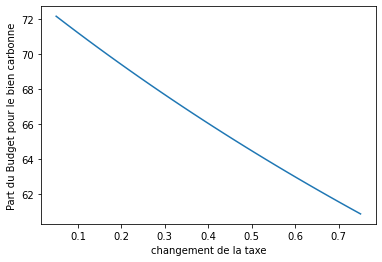

In [88]:
#Varier la part du bien par rapport à la taxe imposé

import numpy as np 
dpcs = np.linspace(0.05,0.75,30)

Budgets_c = [Sc_taxe(2,tpc,1,0.7,0.5,100) for tpc in dpcs]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dpcs,Budgets_c)
plt.xlabel('changement de la taxe')
plt.ylabel('Part du Budget pour le bien carbonne')
plt.show()


Le graphique indique une variation négative de la part du bien à forte intensité de carbone dans le budget en fonction de $\gamma$, soit la taxe. De ca fait, plus le gouverement impose une taxe plus importante, plus la part dans le budget pour le bien à forte intensité en carbonne diminue.

## Question 4. Le revenu compensé 

Rappel de la situation après taxe

In [89]:
pc= 2
tpc= 0.1
pn= 1
alpha=0.7
rho=0.5
I=100

a) Calcul de la demande compensée des bien intensifs en carbonne

In [90]:
#La demande compensée

def vstar (pc,pn,alpha,rho,I):
    sub = 1/rho
    C = (alpha*cstar(pc,pn,alpha,rho,I)**rho)
    N = ((1-alpha)*nstar(pc,pn,alpha,rho,I)**rho)
    return (C+N)**sub

def slack(cmp,pc,tpc,pn,alpha,rho,I):
  pc_taxe= pc*(1+tpc)
  return vstar(pc,pn,alpha,rho,I) - vstar(pc_taxe,pn,alpha,rho,(I+cmp))
  
from scipy.optimize import bisect
def compens(pc,tpc,pn,alpha,rho,I):
  return bisect(slack,0,I,args=(pc,tpc,pn,alpha,rho,I))


cmp = compens(pc,tpc,pn,alpha,rho,I)

print (cmp)



7.122093023257037


b) Représentation graphique des compensations pour des valeur de $\gamma$ entre 0.5 et 0.75

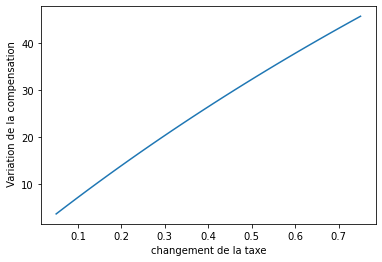

In [91]:
import numpy as np 
dtpc = np.linspace(0.05,0.75,30)

Compenses = [compens(2,tpc,1,0.7,0.5,100) for tpc in dtpc]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dpcs,Compenses)
plt.xlabel('changement de la taxe')
plt.ylabel(' Variation de la compensation')
plt.show()

D'après ce graphique, la compensation exigée par les consommateurs augmente dans le même sens que la variation de la taxe. Donc, quand le gouvernement augmente la taxe sur les bien, il doit aussi augmenter la compensation aux consommateurs.

c) Comparaison de l'utilié initial et l'utilié compensation

In [112]:
Uinitial = vstar(pc,pn,alpha,rho,I)
Ucompense = vstar((pc*(1+tpc)),pn,alpha,rho,(I+cmp))

print (Uinitial)
print (Ucompense)

33.5
33.500000000000384


## Question 5. La compensation sous forme de transfert forfaitaire

a) La demande compensée des biens

In [123]:
def cstar_cmp(pc,tpc,pn,alpha,rho,I):
  Icmp = compens(pc,tpc,pn,alpha,rho,I)+I
  pc_taxe = pc*(1+tpc)
  r = rho/(rho-1)
  sub = pc_taxe**(r-1)*(1-alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return Icmp * sub/denom


def nstar_cmp(pc,tpc,pn,alpha,rho,I):
  Icmp = compens(pc,tpc,pn,alpha,rho,I)+I
  pc_taxe = pc*(1+tpc)
  r = rho/(rho-1)
  sub = (pn*alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return Icmp * sub/denom


qtc_initial = cstar (pc,pn,alpha,rho,I)
qtc_taxe = cstar_taxe (pc,tpc,pn,alpha,rho,I)
qtc_cmp = cstar_cmp (pc,tpc,pn,alpha,rho,I)

print ('La quantié de bien à forte intensité en carbonne est initiallement de', qtc_initial)
print ('Avec la taxe de 10% et sans la compensation, la nouvelle quantité pour le bien en carbonne est de', qtc_taxe)
print ('Avec la compensation du gouvernement de 7,12%, la nouvelle quantité du bien en carbonne est de', qtc_cmp)


La quantié de bien à forte intensité en carbonne est initiallement de 36.56716417910447
Avec la taxe de 10% et sans la compensation, la nouvelle quantité pour le bien en carbonne est de 32.37315010570824
Avec la compensation du gouvernement de 7,12%, la nouvelle quantité du bien en carbonne est de 34.67879597079541


b) La variation de la quantité des biens en carbonnes

In [108]:
delta_c= ((qtc_cmp - qtc_initial)/qtc_initial)*100

print ('la demande des biens à forte intensité en carbone varie de', delta_c)


la demande des biens à forte intensité en carbone varie de -5.164108977824778


## Question 6. Impact du revenu et dépense d'imposer $\gamma$
 Impact net en matière de revenu du gouvernement d'imposer une taxe $\gamma$ et de la dépense de cette compensation

In [116]:
revenu= pc*tpc*qtc_cmp
depense = cmp

print ('le revenu avec imposition de taxe est', revenu)
print ('La dépense de la compensatoin est', depense)
print ((revenu-depense)/depense)

le revenu avec imposition de taxe est 6.935759194159083
La dépense de la compensatoin est 7.122093023257037
-0.026162790697830705


## Question 7. Impact de $\alpha$

a) Varitation du paramètre $\alpha$ par rapport à la demande d'émission de carbonne compensée

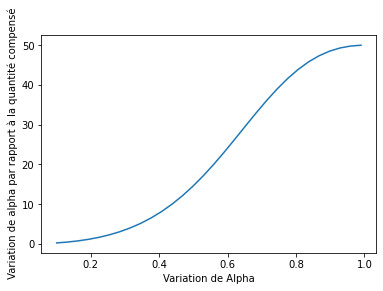

In [96]:
#Variation de Alpha par rapport au bien de carbonne compensé

alphas = np.linspace(0.1,0.99,30)

alpha_cmp = [cstar_cmp (2,0.1,1,alpha,0.5,100) for alpha in alphas]


plt.figure()
plt.plot(alphas,alpha_cmp)
plt.xlabel('Variation de Alpha')
plt.ylabel(' Variation de alpha par rapport à la quantité compensé')
plt.show()

b) Variation du paramètre $\alpha$ par rapport au revenu

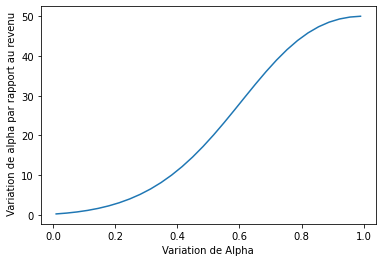

In [120]:
#Variation de Alpha par rapport au revenu

alphas = np.linspace(0.01,0.99,30)

alpha_revenu = [(cstar_cmp (2,0.1,1,alpha,0.5,100)*pc*tpc) for alpha in alphas]


plt.figure()
plt.plot(alphas,alpha_cmp)
plt.xlabel('Variation de Alpha')
plt.ylabel(' Variation de alpha par rapport au revenu')
plt.show()

Les graphique montre une variation position de $\alpha$ par rapport à la demande des biens en  carbonne et le revenu. De ce fait, plus le paramètre $\alpha$ augmente, plus la demande compensé ainsi que le revenu augmente dans le même sens.

## Question 8. Impact de $\rho$

a) Variation du paramètre $\rho$ par rapport a la demande compensée des bien intensif en carbonne 

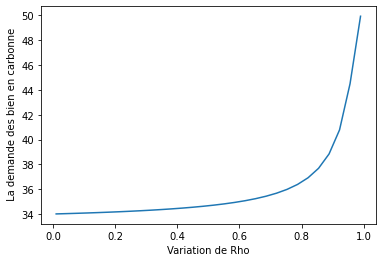

In [121]:
#Variation de Rho par rapport aux bien en carbone compensé

rhos = np.linspace(0.01,0.99,30)

rho_cmp = [cstar_cmp (2,0.1,1,0.7,rho,100) for rho in rhos]


plt.figure()
plt.plot(rhos,rho_cmp)
plt.xlabel('Variation de Rho')
plt.ylabel(' La demande des bien en carbonne')
plt.show()

Le paramètre $\rho$ augmente positivement par rapport à la demande des bien à forte intensités en carbonne. On remarque que plus le paramètre $\rho$ est petit, plus la demandé compensé est stable. Par contre, plus ce paramètre augmente, plus la demande compensée des biens intensifs en carbonne augmente brusquement. 

## Question 9.  Réagir à la déclation d'un parti polique. 


##### "Taxer puis donner des rabais (compensations), c’est comme échanger 4 pièces de 25 cents pour un dollar, ça ne sert à rien"  



 Le raisonnement de ce parti politique n'est pas valide, ceci peut être expliqueé par les quantités des biens à forte intensité en carbonnes à la question 5.

 
- La quantité initale des biens intensifs en carbonne est de 36,57. Cette hausse de quantité est expliqué par l'absence de pénalité.  
- L'imposition uniquement de la taxe du gouvernement engendre une baisse brusque de la quantité de ce bien à 32,37. Cette imposition a pour consequence d'augmenter le prix,donc la consommation de ce bien réduit.  
- L'imposition de la taxe avec la compensation engendre une baisse de la quantité à 34,68, mais cette diminution est moindre que celle avec la taxe. La compensation a pour but d'augmenter le revenu des consommateurs tout en imposant des resctiction. Malgré l'augmentation du revenu, le prix demeure élevée, donc ce n'est pas tous les consommateurs qui seront capable de consommer ce bien.    
